In [1]:
import numpy as np
import skfuzzy as fuzz
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [2]:
final_data_df = pd.read_csv('preprocessedWithoutNans.csv')

In [3]:

final_data_df["weighted_text"]= 10*(final_data_df['cleaned_headline']+" ")+ 4*(final_data_df['cleaned_short_description']+" ")+final_data_df["cleaned_article_text"]
final_data_df.shape

final_data_df.head()

Unnamed: 0.1                                               link  \
0             0  https://www.huffingtonpost.com/entry/marni-for...   
1             1  https://www.huffingtonpost.com/entry/star-wars...   
2             2  https://www.huffingtonpost.com/entry/family-re...   
3             3  https://www.huffingtonpost.com/entry/how-to-ma...   
4             4  https://www.huffingtonpost.com/entry/five-thin...   

                                            headline        category  \
0  Marni Mayhem: The Indignity of Shopping Fast F...  STYLE & BEAUTY   
1  These Incredible 3D Models Of Star Wars Land A...   ENTERTAINMENT   
2  5 Keys to Cutting Your Mental and Emotional Um...        WELLNESS   
3  Cooking For Kitchenphobes: How To Make Vinaigr...    FOOD & DRINK   
4               5 Things You Should Do Every Morning        WELLNESS   

                                   short_description  \
0  I am often mortified (post acquisition) at wha...   
1  Disney has unveiled a detailed look at its new...   
2  It is essential to recognize that these family...   
3  Throw out those bottled dressings. They're no ...   
4  You can try these simple steps to keep your mo...   

                                             authors        date  \
0  Amy Tara Koch, Contributor\nAuthor, travel wri...  2012-03-12   
1                                     Matthew Jacobs  2017-07-14   
2  Judith Johnson, Contributor\nI am an author, m...  2012-05-24   
3                                                NaN  2013-02-28   
4  Andrea Metcalf, Contributor\nHealthy Living, C...  2012-02-08   

   Index_Column                                       article_text  \
0             0  Author, travel writer and mom, lover of la dol...   
1             1  Senior Entertainment Reporter, HuffPost Here i...   
2             2  I am an author, mentor and speaker who helps o...   
3             3  Cooking For Kitchenphobes is a series aimed to...   
4             4  Healthy Living, Certified Trainer, Author, Spe...   

                                cleaned_article_text  \
0  author travel writer mom lover la dolce vita s...   
1  senior entertainment reporter huffpost city cl...   
2  author mentor speaker help others raise consci...   
3  cooking kitchenphobes series aimed put cooking...   
4  healthy living certified trainer author speake...   

                                    cleaned_headline  \
0  marni mayhem indignity shopping fast fashion c...   
1              incredible d model star war land hope   
2        key cutting mental emotional umbilical cord   
3             cooking kitchenphobes make vinaigrette   
4                                thing every morning   

                           cleaned_short_description  Unnamed: 0  \
0  often mortified post acquisition willwouldwill...         NaN   
1    disney unveiled detailed look newest theme park         NaN   
2  essential recognize family role truth simply r...         NaN   
3               throw bottled dressing they are good         NaN   
4  try simple step keep morning track start day h...         NaN   

                                       weighted_text  
0  marni mayhem indignity shopping fast fashion c...  
1  incredible d model star war land hope incredib...  
2   key cutting mental emotional umbilical cord  ...  
3  cooking kitchenphobes make vinaigrette cooking...  
4   thing every morning  thing every morning  thi...

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(final_data_df.drop("category", axis = 1), final_data_df['category'], test_size=0.2, random_state=42)

In [5]:
### TF-IDF Feature Extraction

# Initialize the TF-IDF vectorizer
vectorizer_tf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text
tfidf_matrix = vectorizer_tf.fit_transform(X_train['weighted_text'])

# Convert the TF-IDF matrix to a DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tf.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
tfidf_df.head()

aaron  abandoned  abc   ability      able  abortion  abroad  absence  \
0    0.0        0.0  0.0  0.000000  0.000000       0.0     0.0      0.0   
1    0.0        0.0  0.0  0.000000  0.000000       0.0     0.0      0.0   
2    0.0        0.0  0.0  0.000000  0.000000       0.0     0.0      0.0   
3    0.0        0.0  0.0  0.000000  0.000000       0.0     0.0      0.0   
4    0.0        0.0  0.0  0.026866  0.043523       0.0     0.0      0.0   

   absolute  absolutely  ...      york       you  young  younger  youngest  \
0       0.0    0.000000  ...  0.000000  0.036956    0.0  0.00000       0.0   
1       0.0    0.000000  ...  0.014916  0.020099    0.0  0.00000       0.0   
2       0.0    0.000000  ...  0.000000  0.039854    0.0  0.00000       0.0   
3       0.0    0.018396  ...  0.000000  0.043875    0.0  0.00000       0.0   
4       0.0    0.000000  ...  0.000000  0.028771    0.0  0.03211       0.0   

   youth  youtube  zero  zika  zone  
0    0.0      0.0   0.0   0.0   0.0  
1    0.0      0.0   0.0   0.0   0.0  
2    0.0      0.0   0.0   0.0   0.0  
3    0.0      0.0   0.0   0.0   0.0  
4    0.0      0.0   0.0   0.0   0.0  

[5 rows x 5000 columns]

In [6]:
### LDA

# Sample preprocessed text data
documents = list(X_train['weighted_text'])

# Step 1: Create a document-term matrix (Bag of Words)
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(documents)

# Step 2: Apply LDA
lda_model = LatentDirichletAllocation(n_components=15, random_state=42)
lda_model.fit(doc_term_matrix)

lda_features = lda_model.transform(doc_term_matrix)

lda_features_df = pd.DataFrame(lda_features, columns=[f'LDA-{i}' for i in range(lda_model.n_components)])


In [7]:
lda_features_df.head()

LDA-0     LDA-1     LDA-2     LDA-3     LDA-4     LDA-5     LDA-6  \
0  0.000392  0.000392  0.000392  0.000392  0.000392  0.021169  0.000392   
1  0.068998  0.000110  0.000110  0.000110  0.000110  0.000110  0.816402   
2  0.340543  0.000306  0.117845  0.000306  0.000306  0.000306  0.000306   
3  0.000065  0.000065  0.005089  0.038211  0.000065  0.054585  0.099810   
4  0.000123  0.000123  0.000123  0.000123  0.000123  0.008242  0.683013   

      LDA-7     LDA-8     LDA-9    LDA-10    LDA-11    LDA-12    LDA-13  \
0  0.064966  0.909158  0.000392  0.000392  0.000392  0.000392  0.000392   
1  0.020288  0.004742  0.088472  0.000110  0.000110  0.000110  0.000110   
2  0.000306  0.000306  0.000306  0.000306  0.278811  0.019579  0.240164   
3  0.516153  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065   
4  0.000123  0.000123  0.000123  0.000123  0.000123  0.000123  0.307272   

     LDA-14  
0  0.000392  
1  0.000110  
2  0.000306  
3  0.285568  
4  0.000123

In [8]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=500, random_state=42)
tfidf_svd = svd.fit_transform(tfidf_df)


In [9]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

def build_autoencoder():
    # Input Layer (5000 features)
    input_layer = Input(shape=(5000,), name='Input')

    # Encoder
    x = Dense(2000, activation='relu')(input_layer)
    encoded = Dense(500, activation='relu', name='Encoded')(x)  # Bottleneck layer (500 features)

    # Decoder
    x = Dense(2000, activation='relu')(encoded)
    decoded = Dense(5000, activation='sigmoid', name='Decoded')(x)  # Reconstruct original dimension

    # Autoencoder Model
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

    return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2000)           │    10,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoded (Dense)                 │ (None, 500)            │     1,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000)           │     1,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoded (Dense)                 │ (None, 5000)           │    10,005,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,009,500 (83.96 MB)

 Trainable params: 22,009,500 (83.96 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = autoencoder.fit(
    tfidf_df, tfidf_df,  # Input = Output for reconstruction
    epochs=10,
    batch_size=2048,
    verbose=1
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - loss: 0.2441 - mse: 0.2441
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - loss: 0.0399 - mse: 0.0399
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - loss: 2.0000e-04 - mse: 2.0000e-04


In [11]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("Encoded").output)
encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2000)           │    10,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoded (Dense)                 │ (None, 500)            │     1,000,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,002,500 (41.97 MB)

 Trainable params: 11,002,500 (41.97 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
tfidf_ae = encoder.predict(tfidf_matrix)

624/624 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step


In [13]:
from sklearn.preprocessing import MinMaxScaler

svd_scaler = MinMaxScaler()
tfidf_svd_scale = svd_scaler.fit_transform(tfidf_svd)


ae_scaler = MinMaxScaler()
tfidf_ae_scale = ae_scaler.fit_transform(tfidf_ae)

In [14]:
tfidf_ae_scale

array([[0.1920929 , 0.19049266, 0.17705186, ..., 0.17984378, 0.18450177,
        0.17383236],
       [0.3903041 , 0.39959884, 0.38762802, ..., 0.386753  , 0.3961159 ,
        0.39050677],
       [0.25609884, 0.2540676 , 0.25855398, ..., 0.24993321, 0.25816178,
        0.24598992],
       ...,
       [0.2825219 , 0.28456962, 0.27462578, ..., 0.2789202 , 0.29221264,
        0.27564672],
       [0.15617615, 0.16547614, 0.15516366, ..., 0.15886107, 0.1689564 ,
        0.1591143 ],
       [0.3610223 , 0.3724851 , 0.3590302 , ..., 0.36125618, 0.3738594 ,
        0.3553144 ]], dtype=float32)

In [15]:
tfidf_svd_scale

array([[0.22823969, 0.1308133 , 0.87380843, ..., 0.35076641, 0.53527163,
        0.511296  ],
       [0.34314701, 0.23307284, 0.27822842, ..., 0.41120957, 0.55911332,
        0.60297146],
       [0.27261286, 0.23343441, 0.35567748, ..., 0.17536939, 0.22450494,
        0.28711173],
       ...,
       [0.27531603, 0.21357363, 0.18306339, ..., 0.70124287, 0.48879799,
        0.47851924],
       [0.16329128, 0.31945841, 0.32344468, ..., 0.35522422, 0.42454951,
        0.36342262],
       [0.42224198, 0.2864317 , 0.28859574, ..., 0.28885482, 0.31431478,
        0.61087232]])

In [16]:
added_=tfidf_svd_scale+tfidf_ae_scale
tfidf_added_=pd.DataFrame(added_ , columns=["Tfid-"+str(i) for i in range(500)])

In [17]:
tfidf_added_

Tfid-0    Tfid-1    Tfid-2    Tfid-3    Tfid-4    Tfid-5    Tfid-6  \
0      0.420333  0.321306  1.050860  0.502512  0.303502  0.418170  0.817521   
1      0.733451  0.632672  0.665856  0.770498  0.539115  0.746168  0.714221   
2      0.528712  0.487502  0.614231  0.676755  0.431300  0.649719  0.688961   
3      0.852008  0.732954  0.803079  0.725881  0.492281  0.923496  0.874321   
4      1.135130  0.635757  0.688752  1.235653  0.357876  0.915236  1.068772   
...         ...       ...       ...       ...       ...       ...       ...   
19935  0.245492  0.374922  0.632375  0.480735  0.460694  0.504292  0.656931   
19936  0.897390  0.785716  0.764782  0.858212  0.473726  0.870277  0.744518   
19937  0.557838  0.498143  0.457689  0.796340  0.372086  0.574113  0.866805   
19938  0.319467  0.484935  0.478608  0.394860  0.527459  0.788420  0.787518   
19939  0.783264  0.658917  0.647626  0.645300  0.488040  0.775541  0.722378   

         Tfid-7    Tfid-8    Tfid-9  ...  Tfid-490  Tfid-491  Tfid-492  \
0      0.239943  0.358402  0.487460  ...  0.690032  0.956102  0.582462   
1      0.231439  0.616047  0.472930  ...  1.053524  0.792227  0.882254   
2      0.211944  0.489604  0.687111  ...  0.689560  0.648207  0.956805   
3      0.197880  0.689101  0.368970  ...  0.975005  1.006902  1.111438   
4      0.366768  0.744122  0.293901  ...  0.973452  0.954410  0.942619   
...         ...       ...       ...  ...       ...       ...       ...   
19935  0.261131  0.325036  0.472735  ...  0.712145  0.743302  0.699782   
19936  0.241960  0.723409  0.486066  ...  0.992061  0.903948  0.756147   
19937  0.363636  0.490090  0.395579  ...  0.888905  0.771862  0.725934   
19938  0.260709  0.338476  0.534612  ...  0.741081  0.577993  0.748029   
19939  0.159934  0.598197  0.455766  ...  0.941536  0.894023  0.832055   

       Tfid-493  Tfid-494  Tfid-495  Tfid-496  Tfid-497  Tfid-498  Tfid-499  
0      0.744144  0.524366  0.381791  0.536059  0.530610  0.719773  0.685128  
1      0.871191  0.519452  0.550535  0.914435  0.797963  0.955229  0.993478  
2      0.987668  0.821451  0.245811  0.889911  0.425303  0.482667  0.533102  
3      0.861501  0.640792  0.456001  1.019196  0.904790  0.765025  0.837821  
4      1.199645  0.525127  0.409213  1.080526  0.915537  0.734443  1.131608  
...         ...       ...       ...       ...       ...       ...       ...  
19935  0.580667  0.686307  0.470247  0.638123  0.812081  0.585569  0.672899  
19936  1.262476  0.326917  0.472318  0.927995  0.904653  0.960130  1.152423  
19937  0.750468  0.651558  0.342047  0.772348  0.980163  0.781011  0.754166  
19938  0.677679  0.543329  0.389903  0.625214  0.514085  0.593506  0.522537  
19939  0.886828  0.704794  0.462429  0.934222  0.650111  0.688174  0.966187  

[19940 rows x 500 columns]

In [18]:
tfidf_added_['id'] = X_train['Index_Column'].values
lda_features_df['id'] = X_train['Index_Column'].values

# Merging the LDA features with the TF-IDF features
final_features_df = pd.merge(tfidf_added_, lda_features_df, on='id', how='left')

# Displaying the combined features DataFrame
final_features_df.head()

# final_features_df.to_csv("final_features_df.csv", index = False)

Tfid-0    Tfid-1    Tfid-2    Tfid-3    Tfid-4    Tfid-5    Tfid-6  \
0  0.420333  0.321306  1.050860  0.502512  0.303502  0.418170  0.817521   
1  0.733451  0.632672  0.665856  0.770498  0.539115  0.746168  0.714221   
2  0.528712  0.487502  0.614231  0.676755  0.431300  0.649719  0.688961   
3  0.852008  0.732954  0.803079  0.725881  0.492281  0.923496  0.874321   
4  1.135130  0.635757  0.688752  1.235653  0.357876  0.915236  1.068772   

     Tfid-7    Tfid-8    Tfid-9  ...     LDA-5     LDA-6     LDA-7     LDA-8  \
0  0.239943  0.358402  0.487460  ...  0.021169  0.000392  0.064966  0.909158   
1  0.231439  0.616047  0.472930  ...  0.000110  0.816402  0.020288  0.004742   
2  0.211944  0.489604  0.687111  ...  0.000306  0.000306  0.000306  0.000306   
3  0.197880  0.689101  0.368970  ...  0.054585  0.099810  0.516153  0.000065   
4  0.366768  0.744122  0.293901  ...  0.008242  0.683013  0.000123  0.000123   

      LDA-9    LDA-10    LDA-11    LDA-12    LDA-13    LDA-14  
0  0.000392  0.000392  0.000392  0.000392  0.000392  0.000392  
1  0.088472  0.000110  0.000110  0.000110  0.000110  0.000110  
2  0.000306  0.000306  0.278811  0.019579  0.240164  0.000306  
3  0.000065  0.000065  0.000065  0.000065  0.000065  0.285568  
4  0.000123  0.000123  0.000123  0.000123  0.307272  0.000123  

[5 rows x 516 columns]

In [19]:
final_features_df.shape


(19940, 516)

10066226367.881014
8953190466.587055
8923140977.68703
8910217216.971542
8907917051.649948
Converged
Cluster centers:
 [[0.62113822 0.59917915 0.63749449 ... 0.05102728 0.08091259 0.07517335]
 [0.61279499 0.59693235 0.63354621 ... 0.05938836 0.08140112 0.07993737]
 [0.61454841 0.59845887 0.63254206 ... 0.05645377 0.08350987 0.08126   ]
 ...
 [0.63381987 0.61131183 0.64080245 ... 0.05444634 0.08649508 0.08275922]
 [0.61924325 0.60759553 0.64109832 ... 0.05074593 0.07125923 0.09479381]
 [0.62570488 0.6063385  0.63839435 ... 0.04972429 0.07996097 0.08282551]]
Labels assigned to points:
 [13 10  3 ...  5  4  8]


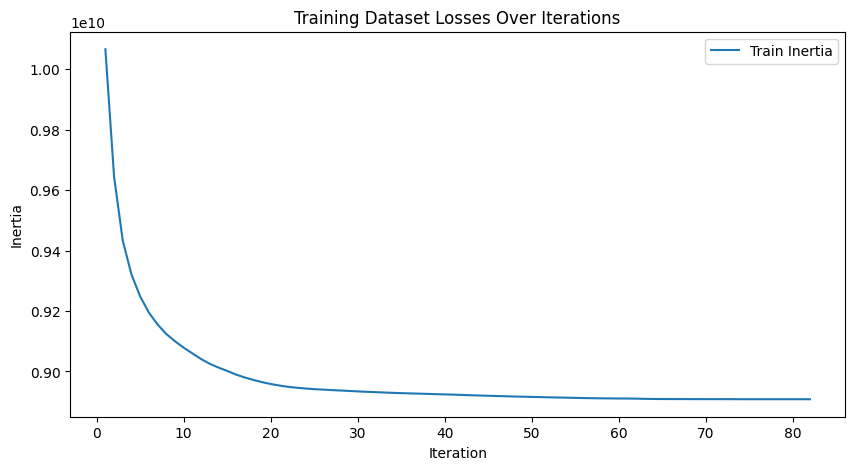

In [29]:
import pickle

# final_features_df = pd.read_csv('final_features_df.csv')

n_clusters_KMeans = 15

# K-Means clustering
kmeans_model = KMeans(
    n_clusters = n_clusters_KMeans,       # Number of clusters to form
    init = 'k-means++',   # Initialization method for centroids ('random' or 'k-means++')
    n_init = 1,          # Number of times the algorithm will run with different centroid seeds
    max_iter = 1,    # Maximum number of iterations for a single run
    random_state = 42     # Random seed for reproducibility
)

training_losses_KMeans = []
n_iterations_KMeans = 5000

prev = kmeans_model

for iteration in range(n_iterations_KMeans):
    if iteration == 0:
        # For the first iteration, fit normally
        kmeans_model.fit(final_features_df)
    else:
        # Use previous cluster centers as initialization for subsequent iterations
        kmeans_model = KMeans(
            n_clusters=prev.n_clusters,
            init=prev.cluster_centers_,
            n_init=1,  # Only one initialization since we provide the centers
            max_iter = 1,
            random_state=42,
        )
        kmeans_model.fit(final_features_df)
        if (prev.inertia_== kmeans_model.inertia_):
            print("Converged")
            break

    training_losses_KMeans.append(kmeans_model.inertia_)
   
    prev = kmeans_model
    if (iteration%20==0):
        print(kmeans_model.inertia_)



cluster_membership_KMeans = kmeans_model.fit(final_features_df)

with open("KMeans_model.pkl", "wb") as f:
    pickle.dump({
        "Dataset": X_train,
        "Features": final_features_df,
        "Model": kmeans_model,
        "TF-IDF Vectorizer": vectorizer_tf,
        "Count Vectorizer": vectorizer,
        "LDA": lda_model,
        "AE": encoder,
        "SVD": svd,
        "AE_scaler": ae_scaler,
        "svd_scaler": svd_scaler
    }, f
    )

# Outputs
print("Cluster centers:\n", kmeans_model.cluster_centers_)
print("Labels assigned to points:\n", kmeans_model.labels_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(training_losses_KMeans) + 1), training_losses_KMeans, label='Train Inertia')
plt.xlabel('Iteration')
plt.ylabel('Inertia')
plt.title('Training Dataset Losses Over Iterations')
plt.legend()
plt.show()

In [22]:
kmeans_model.inertia_

8907915256.885267

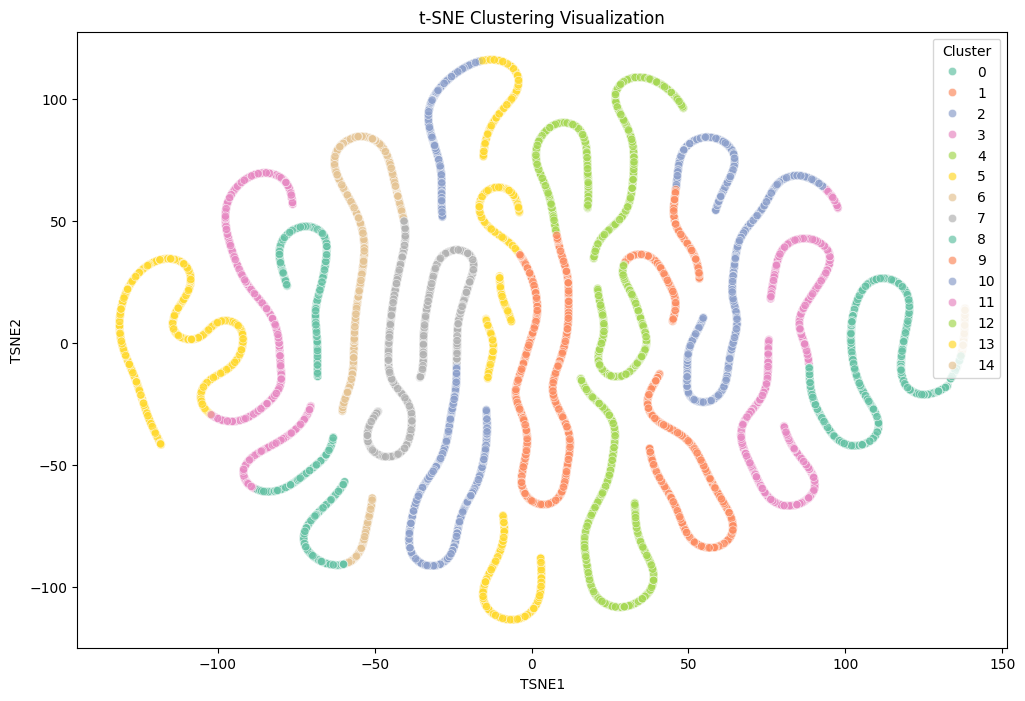

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(final_features_df)  # Replace with your 500-dimensional data

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

cluster_labels=kmeans_model.labels_
reduced_data=reduced_data
import pandas as pd
tsne_df = pd.DataFrame(reduced_data, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = cluster_labels  # Add cluster labels

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster',
    palette=sns.color_palette('Set2', len(set(cluster_labels))),
    data=tsne_df,
    legend='full',
    alpha=0.7
)
plt.title('t-SNE Clustering Visualization')
plt.show()

In [23]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

cluster_labels=kmeans_model.labels_
reduced_data=reduced_data
import pandas as pd
tsne_df = pd.DataFrame(reduced_data, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = cluster_labels  # Add cluster labels

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster',
    palette=sns.color_palette('Set2', len(set(cluster_labels))),
    data=tsne_df,
    legend='full',
    alpha=0.7+
    -
)
plt.title('t-SNE Clustering Visualization')
plt.show()

SyntaxError: invalid syntax (1596978928.py, line 21)

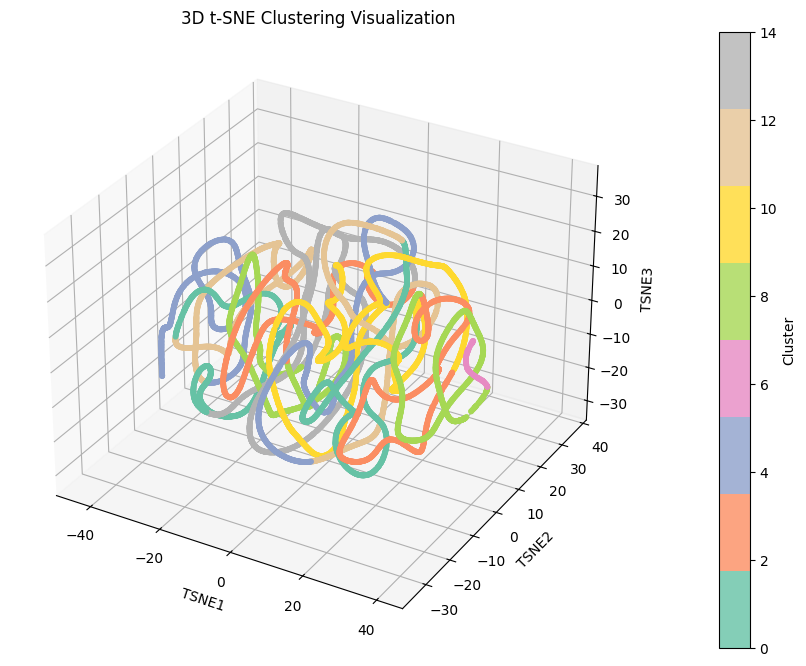

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE to reduce dimensions to 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30)
reduced_data_3d = tsne.fit_transform(final_features_df)  # Replace with your 500-dimensional data

# Prepare a DataFrame for easy handling
tsne_df_3d = pd.DataFrame(reduced_data_3d, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df_3d['Cluster'] = cluster_labels  # Add cluster labels

# Plot in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    tsne_df_3d['TSNE1'], 
    tsne_df_3d['TSNE2'], 
    tsne_df_3d['TSNE3'], 
    c=tsne_df_3d['Cluster'], 
    cmap='Set2', 
    s=10, 
    alpha=0.8
)

# Add a color bar
plt.colorbar(scatter, ax=ax, pad=0.1, label='Cluster')

# Axis labels
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
plt.title('3D t-SNE Clustering Visualization')
plt.show()


c:\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


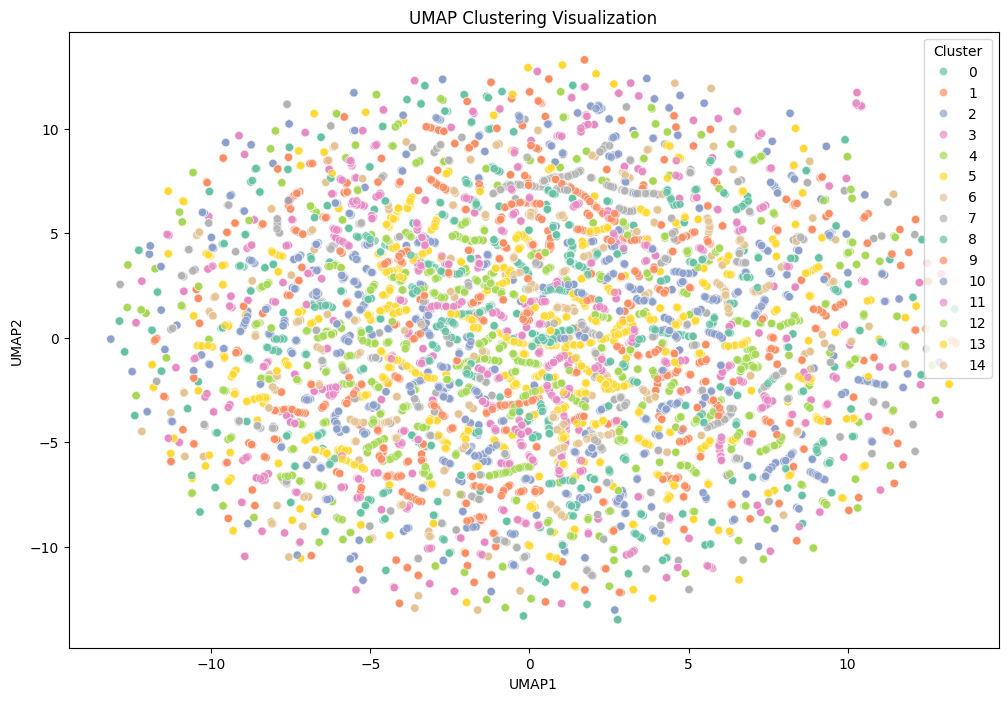

In [39]:
import umap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 2D using UMAP
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=3)
umap_reduced_data = umap_model.fit_transform(final_features_df)  # Replace with your 500-dimensional data

# Convert to DataFrame for better handling
umap_df = pd.DataFrame(umap_reduced_data, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = cluster_labels  # Add cluster labels from clustering algorithm

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='UMAP1', y='UMAP2',
    hue='Cluster',
    palette=sns.color_palette('Set2', len(set(cluster_labels))),
    data=umap_df,
    legend='full',
    alpha=0.7
)
plt.title('UMAP Clustering Visualization')
plt.show()


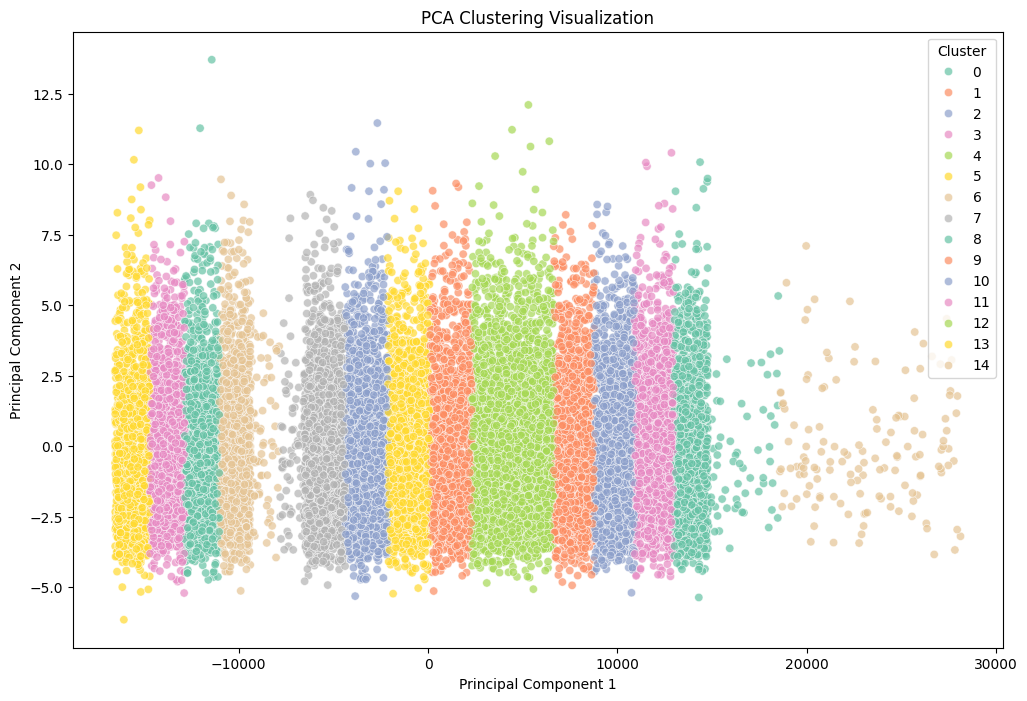

In [32]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
pca_reduced_data = pca.fit_transform(final_features_df)  # Replace with your 500-dimensional data

# Convert to DataFrame for better handling
pca_df = pd.DataFrame(pca_reduced_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels  # Add cluster labels from clustering algorithm

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette=sns.color_palette('Set2', len(set(cluster_labels))),
    data=pca_df,
    legend='full',
    alpha=0.7
)
plt.title('PCA Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


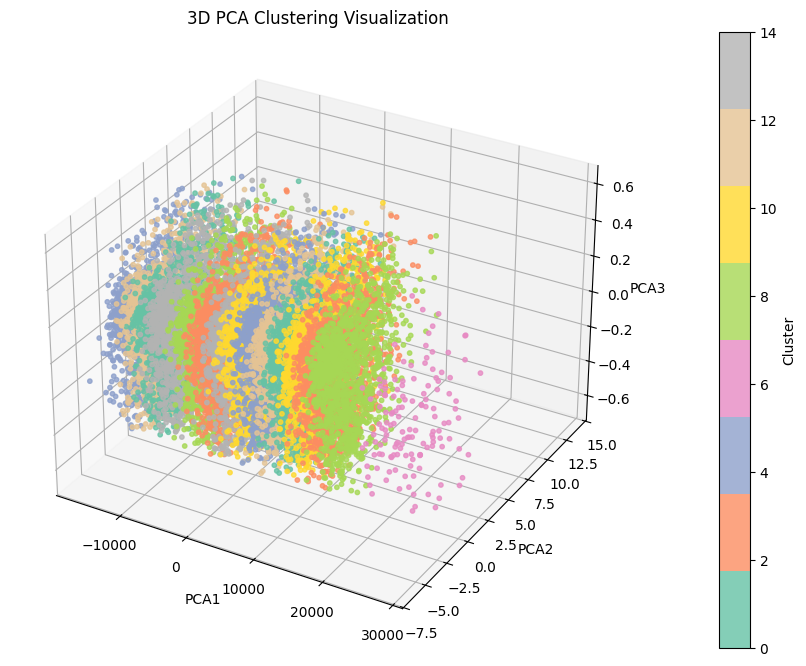

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3D using PCA
pca_3d = PCA(n_components=3, random_state=42)
pca_reduced_data_3d = pca_3d.fit_transform(final_features_df)

# Convert to DataFrame
pca_df_3d = pd.DataFrame(pca_reduced_data_3d, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df_3d['Cluster'] = cluster_labels

# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_df_3d['PCA1'], pca_df_3d['PCA2'], pca_df_3d['PCA3'],
    c=pca_df_3d['Cluster'], cmap='Set2', s=10, alpha=0.8
)

plt.colorbar(scatter, ax=ax, pad=0.1, label='Cluster')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('3D PCA Clustering Visualization')
plt.show()


c:\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


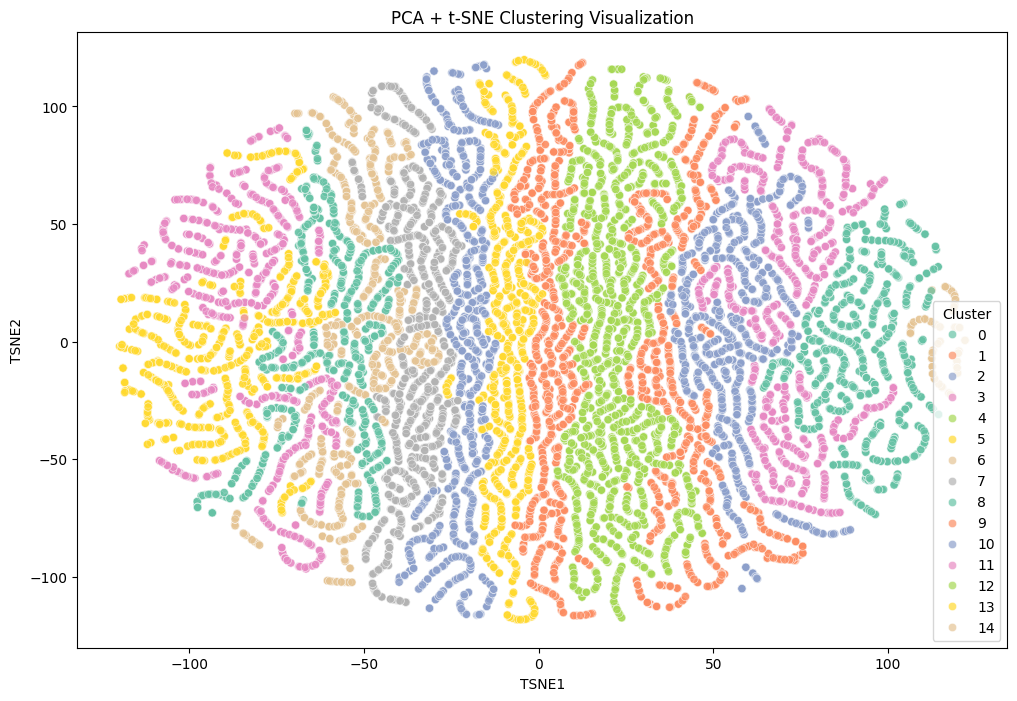

In [40]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Apply PCA to reduce dimensionality to a manageable size (e.g., 50 components)
pca = PCA(n_components=50, random_state=42)
pca_data = pca.fit_transform(final_features_df)  # Replace 'final_features_df' with your data

# Step 2: Apply t-SNE on the PCA-reduced data
tsne = TSNE(n_components=2, perplexity=3, n_iter=1000, random_state=42, init='pca')
tsne_data = tsne.fit_transform(pca_data)

# Step 3: Create a DataFrame for plotting
cluster_labels = kmeans_model.labels_  # Replace with your clustering labels
tsne_df = pd.DataFrame(tsne_data, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = cluster_labels

# Step 4: Visualize the t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster',
    palette=sns.color_palette('Set2', len(set(cluster_labels))),
    data=tsne_df,
    legend='full',
    alpha=0.7
)
plt.title('PCA + t-SNE Clustering Visualization')
plt.show()


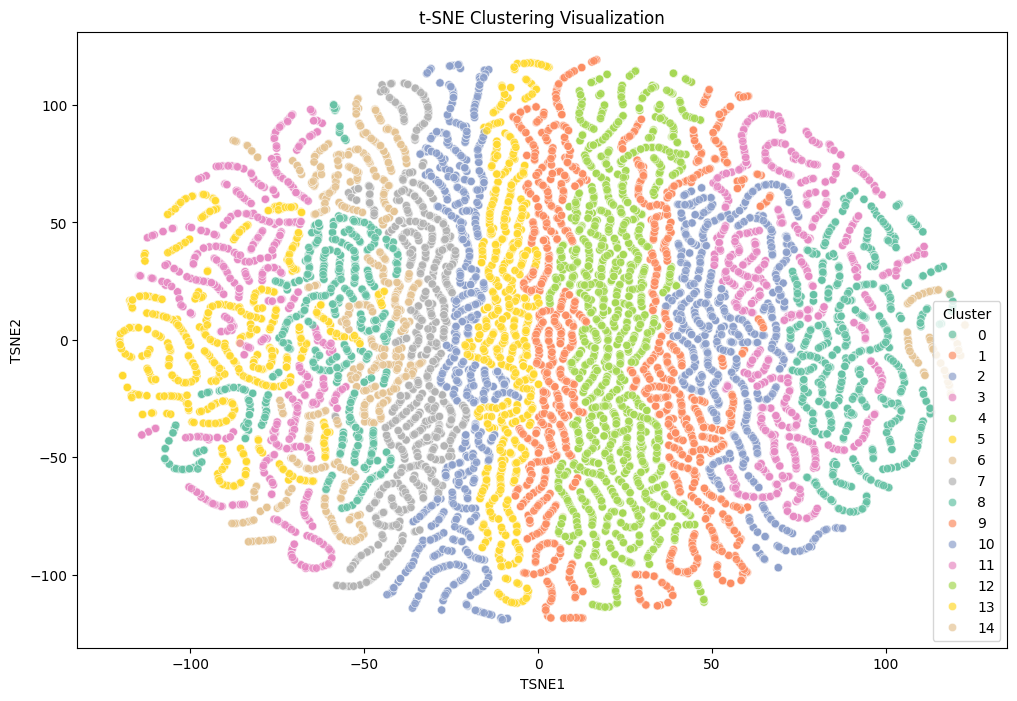

In [36]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=3)
reduced_data = tsne.fit_transform(final_features_df)  # Replace with your 500-dimensional data

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

cluster_labels=kmeans_model.labels_
reduced_data=reduced_data
import pandas as pd
tsne_df = pd.DataFrame(reduced_data, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = cluster_labels  # Add cluster labels

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster',
    palette=sns.color_palette('Set2', len(set(cluster_labels))),
    data=tsne_df,
    legend='full',
    alpha=0.7
)
plt.title('t-SNE Clustering Visualization')
plt.show()




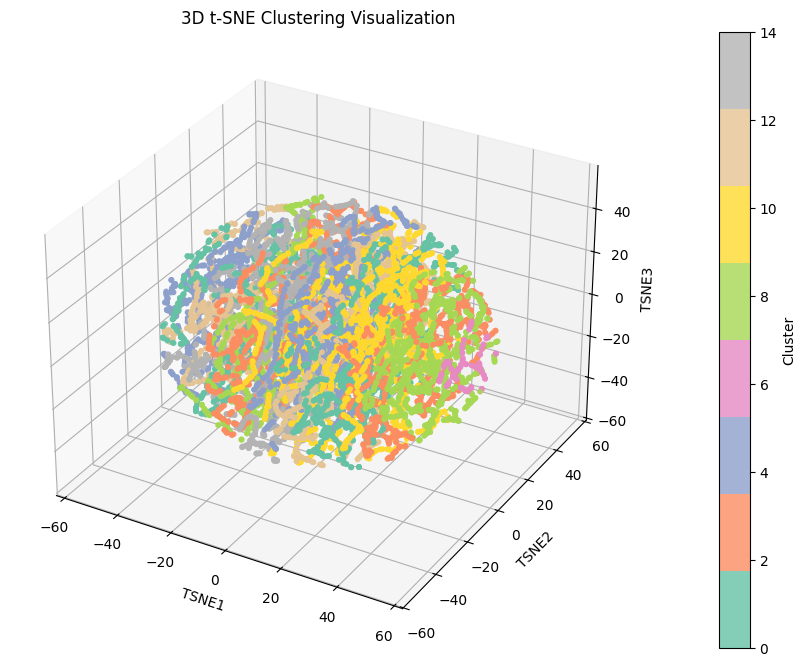

In [37]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE to reduce dimensions to 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=3)
reduced_data_3d = tsne.fit_transform(final_features_df)  # Replace with your 500-dimensional data

# Prepare a DataFrame for easy handling
tsne_df_3d = pd.DataFrame(reduced_data_3d, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df_3d['Cluster'] = cluster_labels  # Add cluster labels

# Plot in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    tsne_df_3d['TSNE1'], 
    tsne_df_3d['TSNE2'], 
    tsne_df_3d['TSNE3'], 
    c=tsne_df_3d['Cluster'], 
    cmap='Set2', 
    s=10, 
    alpha=0.8
)

# Add a color bar
plt.colorbar(scatter, ax=ax, pad=0.1, label='Cluster')

# Axis labels
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
plt.title('3D t-SNE Clustering Visualization')
plt.show()


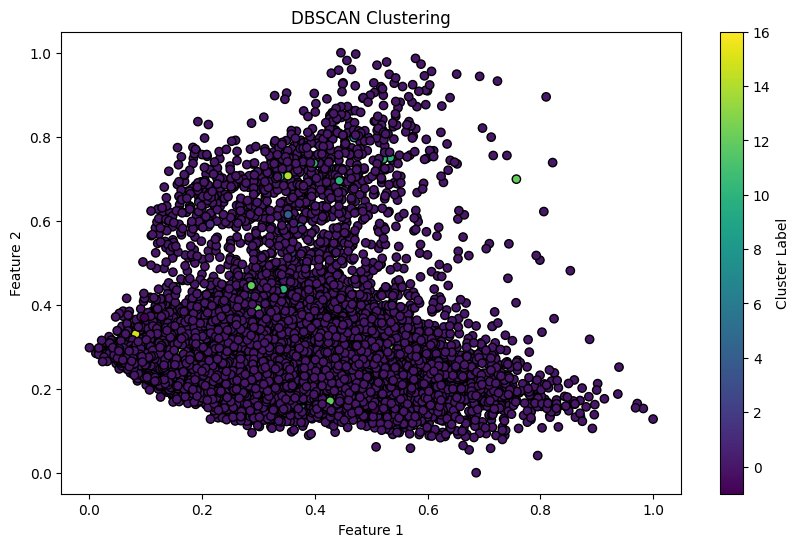

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Apply DBSCAN
DBSCAN_model = DBSCAN(eps=150, min_samples=3)  # Adjust `eps` and `min_samples` as needed
labels = DBSCAN_model.fit_predict(final_features_df)

# Convert DataFrame to a NumPy array for plotting
data_array = final_features_df.values  # This gets the underlying array

# Create a scatter plot of the data points with colors corresponding to cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')

# Plot settings
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Cluster Label')

# Display the plot
plt.show()


In [52]:
set(DBSCAN_model.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=15, linkage='ward')  # Adjust `n_clusters` and `linkage` as needed
labels = agglo_model.fit_predict(final_features_df)



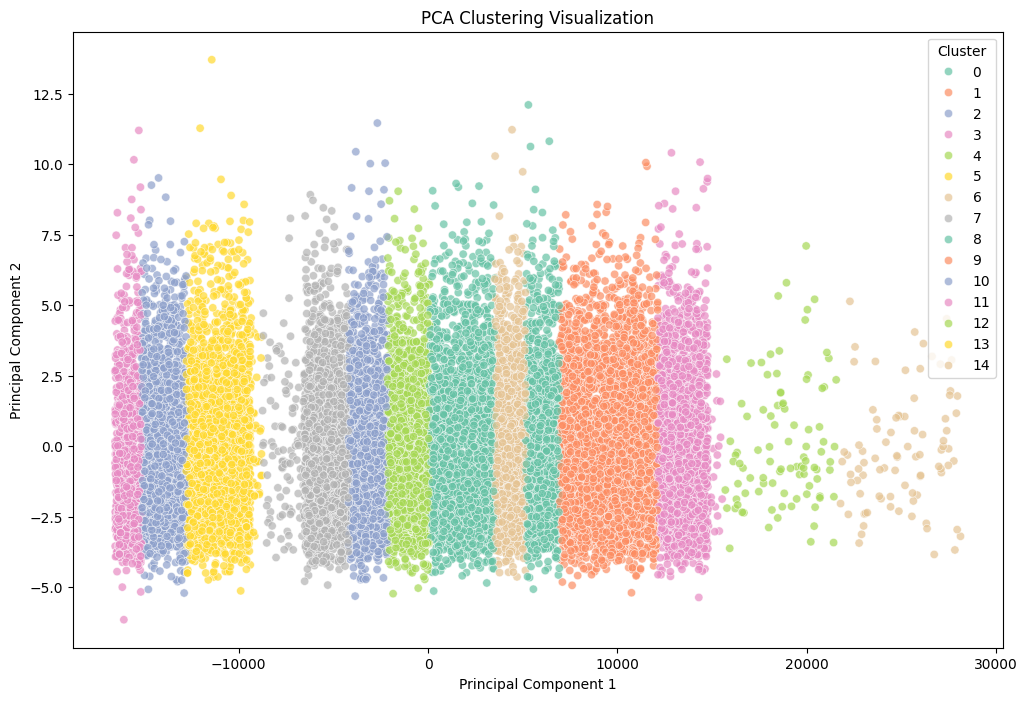

In [61]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
pca_reduced_data = pca.fit_transform(final_features_df)  # Replace with your 500-dimensional data

# Convert to DataFrame for better handling
pca_df = pd.DataFrame(pca_reduced_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels  # Add cluster labels from clustering algorithm

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette=sns.color_palette('Set2', len(set(labels))),
    data=pca_df,
    legend='full',
    alpha=0.7
)
plt.title('PCA Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


[1.55395647e+11 1.16540217e+11 1.15634588e+11 1.10422906e+11
 9.59141281e+10 7.51590881e+10 4.90776022e+10 2.64780130e+10
 1.91920348e+10 1.53727288e+10 1.27079506e+10 1.15564820e+10
 1.09133180e+10 1.02403597e+10 9.92421348e+09 9.82466271e+09
 9.76981221e+09 9.72399051e+09 9.68132461e+09 9.64055231e+09
 9.60127996e+09 9.56339416e+09 9.52692045e+09 9.49195965e+09
 9.45864474e+09 9.42710752e+09 9.39745337e+09 9.36974517e+09
 9.34399668e+09 9.32017406e+09 9.29820327e+09 9.27798035e+09
 9.25938210e+09 9.24227561e+09 9.22652584e+09 9.21200106e+09
 9.19857639e+09 9.18613590e+09 9.17457350e+09 9.16379310e+09
 9.15370831e+09 9.14424182e+09 9.13532463e+09 9.12689525e+09
 9.11889888e+09 9.11128669e+09 9.10401505e+09 9.09704498e+09
 9.09034152e+09 9.08387328e+09 9.07761197e+09 9.07153202e+09
 9.06561028e+09 9.05982572e+09 9.05415916e+09 9.04859311e+09
 9.04311152e+09 9.03769969e+09 9.03234411e+09 9.02703237e+09
 9.02175305e+09 9.01649569e+09 9.01125069e+09 9.00600932e+09
 9.00076370e+09 8.995506

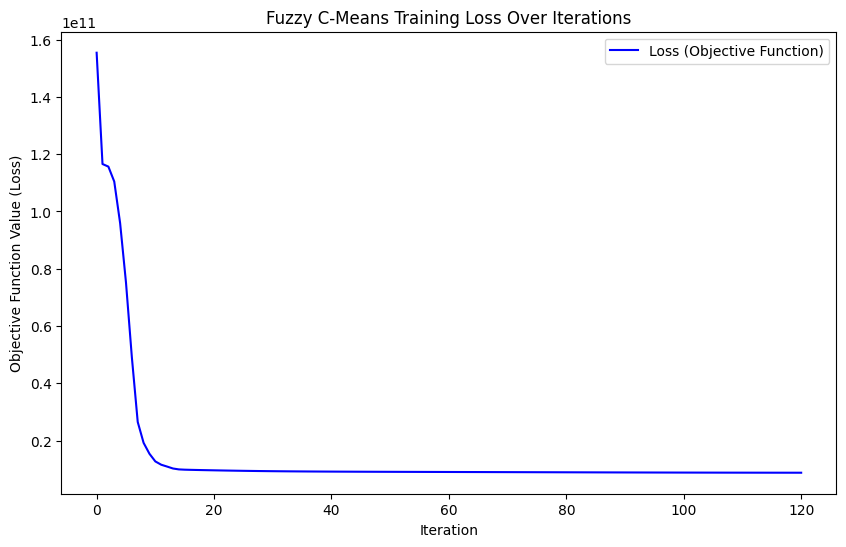

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Number of clusters
n_clusters_FC = 15

# Applying the Fuzzy C-Means Clustering
centres, initial_membership_matrix, final_membership_matrix, distances_matrix, obj_func_values, iteration_count, fpc = fuzz.cluster.cmeans(
    final_features_df.T,
    n_clusters_FC,
    m=2.0,
    error=1,
    maxiter=300,
    init=None
)

# Plotting the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(obj_func_values, linestyle='-', color='b', label='Loss (Objective Function)')
plt.title('Fuzzy C-Means Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (Loss)')
plt.legend()
plt.show()


# Saving the model
with open("FCMeans_model.pkl", "wb") as f:
    pickle.dump({
        "Dataset": X_train,
        "Features": final_features_df,
        "Centres": centres,
        "Initial Membership Matrix": initial_membership_matrix,
        "Final Membership Matrix": final_membership_matrix,
        "Distances Matrix": distances_matrix,
        "Objective Function Values": obj_func_values,
        "TF-IDF Vectorizer": vectorizer_tf,
        "Count Vectorizer": vectorizer,
        "LDA": lda_model,
        "AE": encoder,
        "SVD": svd,
        "AE_scaler": ae_scaler,
        "svd_scaler": svd_scaler
    }, f
)

In [14]:
from sklearn.metrics import silhouette_score
import pickle

temp_dict = {}

with open("KMeans_model.pkl", "rb") as f:
    temp_dict = pickle.load(f)

dataset = temp_dict["Dataset"]
features = temp_dict["Features"]

silhouette_scores = []

for n_clusters in range(10,31):
    centres, initial_membership_matrix, final_membership_matrix, distances_matrix, obj_func_values, iteration_count, fpc = fuzz.cluster.cmeans(
        features.T,
        n_clusters,
        m=2.0,
        error=1e-5,
        maxiter=100,
        init=None
    )
    cluster_labels = np.argmax(final_membership_matrix, axis=0)
    score = silhouette_score(features, cluster_labels)
    silhouette_scores.append(score)
    print(f"Done {n_clusters}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(10,31), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Silhouette Analysis for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(10,31)) 
plt.grid()

Done 10


KeyboardInterrupt: 

In [ ]:
import seaborn as sns
import random

random_indices = random.sample(range(final_membership_matrix.shape[1]), 50)

plt.figure(figsize=(10, 6))
sns.heatmap([final_membership_matrix[cluster, random_indices] for cluster in range(n_clusters_FC)], cmap='viridis', cbar=True, xticklabels=[f"Data Point {i}" for i in range(1,51)])
plt.title("Membership Matrix Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Data Points")
plt.show()

## Code for predictions

In [ ]:
import random

def predict_articles(article, model, num_articles = 3):

    if model == "KMeans":
        temp_dict = {}
        with open("KMeans_model.pkl", "rb") as file:
            temp_dict = pickle.load(file)

        clusterer = temp_dict["Model"]
        dataset = temp_dict["Dataset"]
        feature_set = temp_dict["Features"]
        vectorizer_tf = temp_dict["TF-IDF Vectorizer"]
        vectorizer = temp_dict["Count Vectorizer"]
        lda_model = temp_dict["LDA"]
        encoder = temp_dict["AE"]
        svd = temp_dict["SVD"]
        svd_scaler = temp_dict["svd_scaler"]
        ae_scaler = temp_dict["AE_scaler"]
        centres = clusterer.cluster_centers_
        labels = clusterer.labels_
    
    else: # Change this for the Fuzzy C-Means algorithm
        temp_dict = {}
        with open("FCMeans_model.pkl", "rb") as file:
            temp_dict = pickle.load(file)

        clusterer = temp_dict["Model"]
        dataset = temp_dict["Dataset"]
        feature_set = temp_dict["Features"]
        vectorizer_tf = temp_dict["TF-IDF Vectorizer"]
        vectorizer = temp_dict["Count Vectorizer"]
        lda_model = temp_dict["LDA"]
        encoder = temp_dict["AE"]
        svd = temp_dict["SVD"]
        svd_scaler = temp_dict["SVD_scaler"]
        ae_scaler = temp_dict["AE_scaler"]
        centres = clusterer.cluster_centers_
        labels = clusterer.labels_

    temp_tfidf_matrix = vectorizer_tf.transform([article["weighted_text"]])

    # Convert the TF-IDF matrix to a DataFrame for better visualization (optional)
    temp_tfidf_df = pd.DataFrame(temp_tfidf_matrix.toarray(), columns=vectorizer_tf.get_feature_names_out())

    temp_document = article["weighted_text"]

    temp_doc_term_matrix = vectorizer.transform([temp_document])

    temp_lda_features = lda_model.transform(temp_doc_term_matrix)

    temp_lda_features_df = pd.DataFrame(temp_lda_features, columns=[f'LDA-{i}' for i in range(lda_model.n_components)])

    temp_tfidf_ae = encoder.predict(temp_tfidf_matrix)

    temp_tfidf_svd = svd.transform(temp_tfidf_df)

    temp_tfidf_svd_scale = svd_scaler.transform(temp_tfidf_svd)

    temp_tfidf_ae_scale = ae_scaler.transform(temp_tfidf_ae)

    temp_added_ = temp_tfidf_svd_scale + temp_tfidf_ae_scale
    temp_tfidf_added_ = pd.DataFrame(temp_added_ , columns=["Tfid-"+str(i) for i in range(500)])

    temp_tfidf_added_['id'] = article["Index_Column"]
    temp_lda_features_df['id'] = article["Index_Column"]

    # Merging the LDA features with the TF-IDF features
    temp_final_features_df = pd.merge(temp_tfidf_added_, temp_lda_features_df, on='id', how='left')

    if model == "KMeans":
        nearest_cluster = np.argmin(np.linalg.norm(temp_final_features_df.to_numpy()[:, np.newaxis, :] - centres, axis = 2), axis = 1)

        recommended_indices = random.sample([i for i in labels if nearest_cluster == i], num_articles)

        return [dataset.iloc[i, :] for i in recommended_indices]
        


indices = random.sample(range(X_test.shape[0]), 10)

predicted_articles = []

for i in indices:
    print("For the Article:")
    print(X_test.iloc[i, :])
    print("----------------------------------------------------------------------------------")
    print("The following are the predicted articles:")
    predicted_articles.append(predict_articles(X_test.iloc[i, :], "KMeans"))
    for j in range(len(predicted_articles[-1])):
        print(predicted_articles[-1][j])
        print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")

For the Article:
Unnamed: 0.1                                                             12195
link                         https://www.huffingtonpost.com/entry/trumpsupe...
headline                     #TrumpSuperpowers Has The Ability To Unite The...
short_description                                              BOOM! POW! BAM!
authors                                                          Andy McDonald
date                                                                2016-03-30
Index_Column                                                             12195
article_text                 Writer, HuffPost As the HuffPost Comedy hashta...
cleaned_article_text         writer huffpost huffpost comedy hashtag game r...
cleaned_headline             trumpsuperpowers ability unite internet single...
cleaned_short_description                                         boom pow bam
Unnamed: 0                                                              2195.0
weighted_text                trumps

UnboundLocalError: cannot access local variable 'vectorizer_tf' where it is not associated with a value

## Code for Metrics

1) Adjusted Rand Index (ARI):

* Measures the similarity between predicted and true cluster assignments, adjusted for chance.
* Values range from -1 to 1; higher is better.

2) Normalized Mutual Information (NMI):

* Evaluates the amount of information shared between true and predicted labels.
* Values range from 0 to 1; higher is better.

3) Homogeneity, Completeness, and V-Measure:

* Homogeneity ensures clusters contain only points from the same class.
* Completeness ensures all points of a class are assigned to the same cluster.
* V-Measure is the harmonic mean of homogeneity and completeness.

In [71]:
### Evaluating the K Means clusters

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import LabelEncoder

unique_labels_KMeans = np.unique(kmeans_model.labels_)

cluster_labels = {}

for i in unique_labels_KMeans:
    print(f'Cluster {i}:')
    cluster_articles = Y_train[kmeans_model.labels_ == i]
    category_counts = cluster_articles.value_counts(normalize=True) * 100
    cluster_labels[f"Cluster {i}"] = category_counts.idxmax()
    print(category_counts)
    print("Cluster Label: "+cluster_labels[f"Cluster {i}"])
    print("------------------------------------------------------------------")


print("\n\nEvaluation Metrics:\n\n")

label_encoder = LabelEncoder()

predicted_labels = [cluster_labels[f"Cluster {i}"] for i in kmeans_model.labels_]

true_labels = list(Y_train)

all_labels = true_labels + predicted_labels
label_encoder.fit(all_labels)  # Fit on the combined true and predicted labels
true_labels = label_encoder.transform(true_labels)
predicted_labels = label_encoder.transform(predicted_labels)

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(true_labels, predicted_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

# Homogeneity, Completeness, and V-Measure
homogeneity = homogeneity_score(true_labels, predicted_labels)
completeness = completeness_score(true_labels, predicted_labels)
v_measure = v_measure_score(true_labels, predicted_labels)

print(f"Homogeneity: {homogeneity:.4f}")
print(f"Completeness: {completeness:.4f}")
print(f"V-Measure: {v_measure:.4f}")




# for cluster in unique_labels_KMeans:

#     print(f"Cluster {cluster}:")

#     cluster_true_labels = list(Y_train[kmeans_model.labels_ == cluster])
#     cluster_pred_labels = [cluster_labels[f"Cluster {cluster}"] for i in range(len(cluster_true_labels))]

#     all_labels = cluster_true_labels + cluster_pred_labels
#     label_encoder.fit(all_labels)  # Fit on the combined true and predicted labels
#     cluster_true_labels = label_encoder.transform(cluster_true_labels)
#     cluster_pred_labels = label_encoder.transform(cluster_pred_labels)

#     print(cluster_true_labels)
#     print(cluster_pred_labels)

#     # Adjusted Rand Index (ARI)
#     ari = adjusted_rand_score(cluster_true_labels, cluster_pred_labels)
#     print(f"Adjusted Rand Index (ARI): {ari:.4f}")

#     # Normalized Mutual Information (NMI)
#     nmi = normalized_mutual_info_score(cluster_true_labels, cluster_pred_labels)
#     print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

#     # Homogeneity, Completeness, and V-Measure
#     homogeneity = homogeneity_score(cluster_true_labels, cluster_pred_labels)
#     completeness = completeness_score(cluster_true_labels, cluster_pred_labels)
#     v_measure = v_measure_score(cluster_true_labels, cluster_pred_labels)

#     print(f"Homogeneity: {homogeneity:.4f}")
#     print(f"Completeness: {completeness:.4f}")
#     print(f"V-Measure: {v_measure:.4f}")

#     print("------------------------------------------------------------------")
    

Cluster 0:
category
STYLE & BEAUTY    9.306122
FOOD & DRINK      8.408163
PARENTS           8.244898
WELLNESS          6.775510
TRAVEL            6.775510
ENTERTAINMENT     6.693878
COMEDY            6.693878
POLITICS          6.612245
PARENTING         6.448980
HOME & LIVING     6.122449
QUEER VOICES      6.122449
BUSINESS          5.714286
SPORTS            5.551020
BLACK VOICES      5.469388
HEALTHY LIVING    5.061224
Name: proportion, dtype: float64
Cluster Label: STYLE & BEAUTY
------------------------------------------------------------------
Cluster 1:
category
STYLE & BEAUTY    8.212560
PARENTING         7.867495
FOOD & DRINK      7.798482
POLITICS          7.246377
TRAVEL            7.246377
ENTERTAINMENT     7.039337
WELLNESS          7.039337
SPORTS            6.901311
HEALTHY LIVING    6.694272
HOME & LIVING     6.556246
PARENTS           6.004141
BLACK VOICES      5.728088
BUSINESS          5.383023
QUEER VOICES      5.244997
COMEDY            5.037957
Name: proportion, dt